In [1]:
# Import all custom-made functions
import MASI
# Import all the usual stuff
import numpy as np
pi = np.pi # coz' I'm lazy af
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
# Matplotlib in inline mode
%matplotlib inline
# Shut warnings off (I'm a terrible person)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# define time vector
T = 1
f = 1/T # corresponding frequency
Tech = 0.001 # sampling period
t = np.arange(-2*T,2*T,Tech)

In [3]:
#x = sp.signal.chirp(t,10,2,30)
x = np.sin(10*t)+ 2*np.sin(2*t) + np.sin(5*t) - 3*np.sin(0.5*t)
x = (x-x.min())/(np.abs(x.max()-x.min())) #translate and normalize

In [4]:
plt.plot(t,x,'b')
#plt.xticks(np.linspace(-T/2,2*T,6),('-T/2','0','T/2','T','','2T'))
plt.xlim((t.min(),t.max()))
plt.ylim((x.min()-0.15*np.abs(x.min()),1.25*x.max()))
plt.title('my signal')
plt.show()

In [5]:
# sampling
Te = 0.25
comb_Te = MASI.Dirac_comb_Te(t,Tech,Te)
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(t,x,label=r'x(t)')
plt.xlim(t.min(),t.max())
plt.ylim(0,2)
plt.legend(loc='upper left',fontsize=14)
plt.subplot(132)
plt.plot(t,comb_Te,label=r'$Ш_{T_e}(t)$')
plt.xlim(t.min(),t.max())
plt.legend(loc='upper right',fontsize=14)
plt.ylim(0,1.2)
plt.subplot(133)
plt.plot(t,x,c='gray',linestyle='--')
plt.plot(t,x*comb_Te,label=r'$x(t)\times Ш_{T_e}(t)$')
plt.ylim(0,2)
plt.xlim(t.min(),t.max())
plt.legend(loc='upper left',fontsize=14)
plt.show()

In [6]:
#sampling
step = int(Te/Tech)
idx0 = int(t.size/2)
idxsup = np.arange(idx0+step,t.size,step).astype(int)
idxinf = np.arange(idx0-step,-1,-step).astype(int)
idx = np.sort(np.hstack((idxinf,idx0,idxsup)))
te = t[idx]
xe = x[idx]
x_interp = np.zeros(x.size)
for n,nTe in enumerate(te):
    x_interp += xe[n]*MASI.sinc(np.pi*(t-nTe)/Te)

Text(0.5,0,'sinus cardinal')

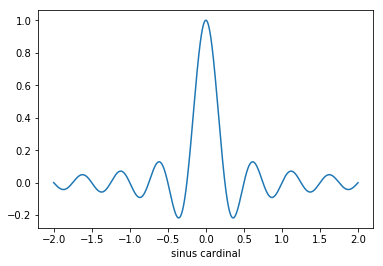

In [7]:
plt.plot(t,MASI.sinc(np.pi*(t)/Te))
plt.xlabel('sinus cardinal')

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.stem(te,xe)
plt.plot(t,x,'r')
plt.xlim((t.min(),t.max()))
plt.subplot(132)
plt.plot(t,x_interp)
plt.plot(t,x,'r')
plt.xlim((t.min(),t.max()))
plt.ylim((x_interp.min()-0.15*np.abs(x_interp.min()),x_interp.max()+0.15*np.abs(x_interp.max())))
plt.xlabel('Reconstruction interpolation sinc')
# plt.yscale('log')
plt.subplot(133)
plt.plot(t,x,'r')
plt.plot(te,xe,'-')
plt.xlim((t.min(),t.max()))
plt.ylim((x_interp.min()-0.15*np.abs(x_interp.min()),x_interp.max()+0.15*np.abs(x_interp.max())))
plt.xlabel('Reconstruction interpolation linéaire')

plt.show()

In [9]:
sigma = 0.1
x_bruit = x + 0.2*np.random.normal(0, sigma, x.size)

Text(0.5,0,'Signal bruité')

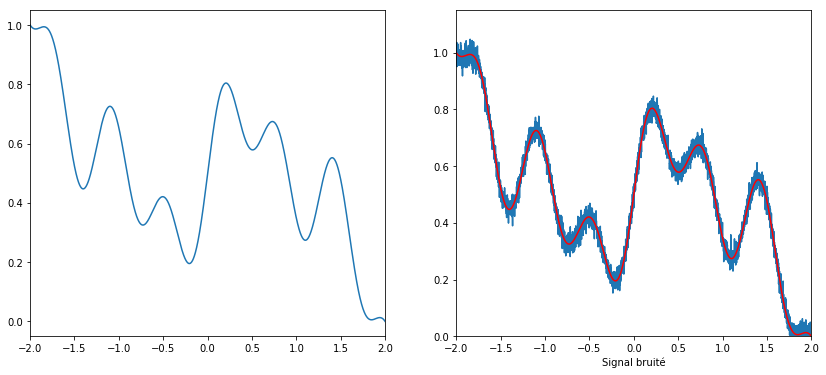

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(t,x)
plt.xlim((t.min(),t.max()))
plt.subplot(122)
plt.plot(t,x_bruit)
plt.plot(t,x,'r')
plt.xlim((t.min(),t.max()))
plt.ylim((x.min()-0.15*np.abs(x.min()),x.max()+0.15*np.abs(x.max())))
plt.xlabel('Signal bruité')

In [13]:
x_denoised = np.zeros(x.size)
w = 12
for ti in range(t.size-w-1):
    x_denoised[ti+w] = np.mean(x_bruit[ti-w:ti+w])

Text(0.5,0,'signal débruité par moyenne glissante')

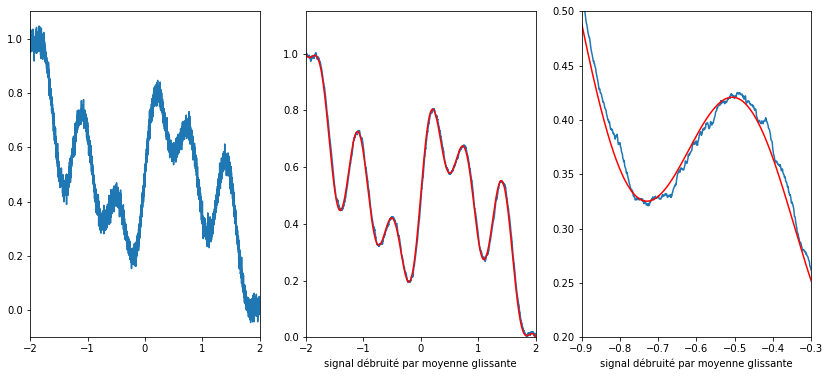

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.plot(t,x_bruit)
plt.xlim((t.min(),t.max()))
plt.subplot(132)
plt.plot(t,x_denoised)
plt.plot(t,x,'r')
plt.xlim((t.min(),t.max()))
plt.ylim((x.min()-0.15*np.abs(x.min()),x.max()+0.15*np.abs(x.max())))
plt.xlabel('signal débruité par moyenne glissante')
plt.subplot(133)
plt.plot(t,x_denoised)
plt.plot(t,x,'r')
plt.xlim((-0.9,-0.3))
plt.ylim((0.2,0.5))
plt.xlabel('signal débruité par moyenne glissante')

In [17]:
# define time vector
Tech = 0.001 # sampling period
t = np.arange(0,1,Tech)

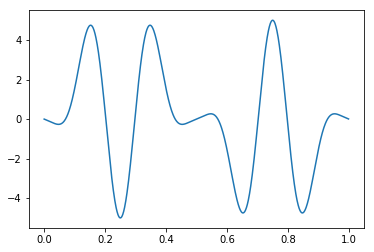

In [18]:
x = np.sin(2*np.pi*t) + 2*np.sin(3*2*np.pi*t) -3* np.sin(5*2*np.pi*t) + np.sin(7*2*np.pi*t)
plt.plot(t,x)

In [28]:
N = 10 # number of functions
x_rec = np.zeros(x.size)
a = np.zeros(N)
for i,n in enumerate(range(1,N+1)) :
    fn = np.sin(n*2*np.pi*t) # decomposition function
    a[i] = x @ fn.T #compute coefficients
    x_rec += a[i]*fn / (fn @ fn.T)  #sum form reconstruction


In [29]:
#Checl orthogonality
k = 1
n = 3
np.sin(k*2*np.pi*t) @ np.sin(n*2*np.pi*t).T

-1.4729862295170815e-14

In [30]:
print('Erreur de reconstruction : ',np.sum((x-x_rec)**2))

Erreur de reconstruction :  2.6071654535485423e-27


(-5.749999999999998, 5.749999999999998)

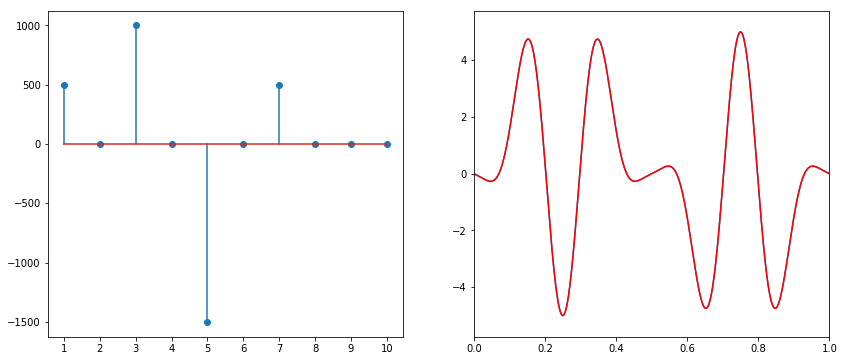

In [31]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.stem(np.arange(1,N+1),a)
plt.xticks(np.arange(1,N+1))
plt.subplot(122)
plt.plot(t,x_rec)
plt.plot(t,x,'r')
plt.xlim((t.min(),t.max()))
plt.ylim((x_rec.min()-0.15*np.abs(x_rec.min()),x_rec.max()+0.15*np.abs(x_rec.max())))

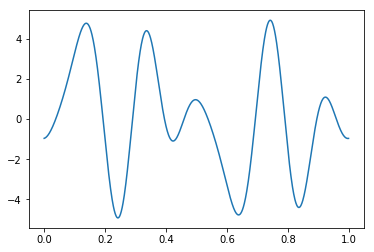

In [34]:
x = np.sin(2*np.pi*t+0.5) + 2*np.sin(3*2*np.pi*t) -3* np.sin(5*2*np.pi*t+0.5) + np.sin(7*2*np.pi*t)
plt.plot(t,x)

In [38]:
N = 10
x_rec = np.zeros(x.size)
a = np.zeros(N)
b = np.zeros(N)
for i,n in enumerate(range(1,N+1)) :
    a[i] = x @ (np.sin(n*2*np.pi*t)).T
    b[i] = x @ (np.cos(n*2*np.pi*t)).T
    x_rec += a[i]*np.sin(n*2*np.pi*t) + b[i]*np.cos(n*2*np.pi*t)
x_rec /= np.sin(2*np.pi*t) @ np.sin(2*np.pi*t)

In [39]:
print('Erreur de reconstruction : ',np.sum((x-x_rec)**2))

Erreur de reconstruction :  4.5088376503166725e-27


(-5.661673934821073, 5.661673934821073)

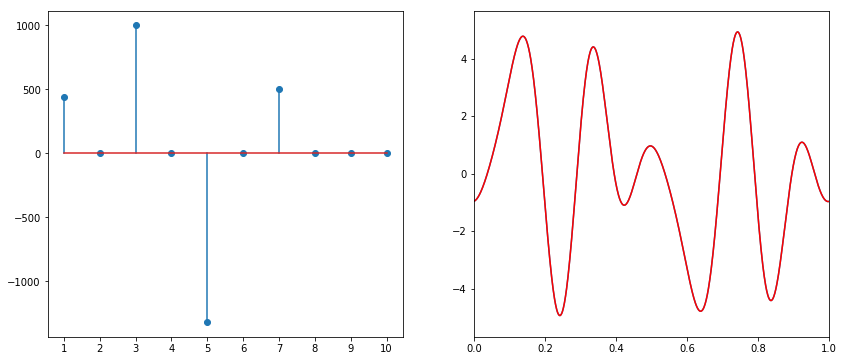

In [40]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.stem(np.arange(1,N+1),a)
plt.xticks(np.arange(1,N+1))
plt.subplot(122)
plt.plot(t,x_rec)
plt.plot(t,x,'r')
plt.xlim((t.min(),t.max()))
plt.ylim((x_rec.min()-0.15*np.abs(x_rec.min()),x_rec.max()+0.15*np.abs(x_rec.max())))

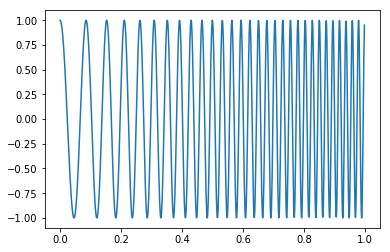

In [429]:
x = sp.signal.chirp(t,10,0.5,30)
plt.plot(t,x)

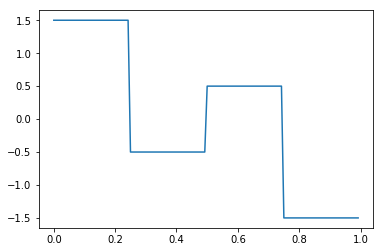

In [52]:
Tech = 1/128
t=np.arange(0,1,Tech)
x = 0.5*signal.square(t*2*pi) + signal.square(2*t*2*pi) 
plt.plot(t,x)

In [53]:
N = 20
x_rec = np.zeros(x.size)
a = np.zeros(N)
b = np.zeros(N)
for i,n in enumerate(range(1,N+1)) :
    a[i] = x @ (np.sin(n*2*np.pi*t)).T
    b[i] = x @ (np.cos(n*2*np.pi*t)).T
    x_rec += a[i]*np.sin(n*2*np.pi*t) + b[i]*np.cos(n*2*np.pi*t)
x_rec /= np.sin(2*np.pi*t) @ np.sin(2*np.pi*t)

In [54]:
print('Erreur de reconstruction : ',np.sum((x-x_rec)**2))

Erreur de reconstruction :  5.342121925167297


(-2.0351964044863546, 2.035196404486353)

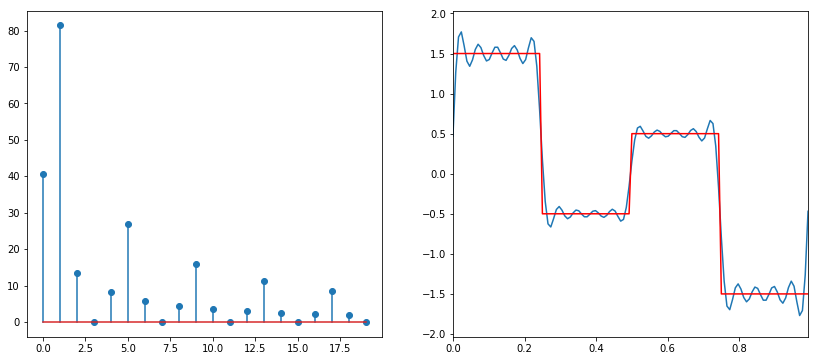

In [55]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.stem(a)
plt.subplot(122)
plt.plot(t,x_rec)
plt.plot(t,x,'r')
plt.xlim((t.min(),t.max()))
plt.ylim((x_rec.min()-0.15*np.abs(x_rec.min()),x_rec.max()+0.15*np.abs(x_rec.max())))

In [56]:
import math
def haar1D(n, SIZE):
    # check power of two
    if math.floor(math.log(SIZE) / math.log(2)) != math.log(SIZE) / math.log(2):
        print("Haar defined only for lengths that are a power of two")
        return None
    if n >= SIZE or n < 0:
        print("invalid Haar index")
        return None
    
    # zero basis vector
    if n == 0:
        return np.ones(SIZE)
    
    # express n > 1 as 2^p + q with p as large as possible;
    # then k = SIZE/2^p is the length of the support
    # and s = qk is the shift
    p = math.floor(math.log(n) / math.log(2))
    pp = int(pow(2, p))
    k = SIZE / pp
    s = (n - pp) * k
    
    h = np.zeros(SIZE)
    h[int(s):int(s+k/2)] = 1
    h[int(s+k/2):int(s+k)] = -1
    # these are not normalized
    return h

In [58]:
plt.plot(haar1D(6,t.size)) # 128 = 2^7

In [59]:
N = 4
x_rec = np.zeros(x.size)
a = np.zeros(N)
for i,n in enumerate(range(N)) :
    h = haar1D(n, 128)
    a[i] = x @ h.T
    x_rec += a[i]*h/(h@h.T)


In [60]:
print('Erreur de reconstruction : ',np.sum((x-x_rec)**2))

Erreur de reconstruction :  0.0


In [61]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.stem(a)
plt.subplot(122)
plt.plot(t,x_rec)
plt.plot(t,x,'r')
plt.xlim((t.min(),t.max()))
plt.ylim((x_rec.min()-0.15*np.abs(x_rec.min()),x_rec.max()+0.15*np.abs(x_rec.max())))

(-1.725, 1.725)